# 2 McCall search model

In [63]:
!pip install --upgrade quantecon # install quantecon lib

Requirement already up-to-date: quantecon in /Users/shuhu/anaconda3/lib/python3.7/site-packages (0.4.5)


In [64]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import quantecon as qe
from quantecon.distributions import BetaBinomial

## 2.1 Overview

To clarify vague notions such as "involuntary" unemployment, McCall modelled the decision of unemployed agents directly, in terms of factors such as

1. current and likely future wages, $ W_t $
2. impatience (?)
3. Unemployment compensation $c$.

To solve the decision problem, he used dynamic programming.

## 2.2 The McCall Model

### Basic settings

1. An unemployed worker receives in each period a job offer at wage $W_t$.

2. At time $t$, the worker has two choices:

   a) Accept the offer and work permanently at constant wage $W_t$;

   b) Reject the offer, receive unemployment compensation $c$, and reconsider next period.

3. The wage sequence is assumed to be IID (identical independently distributed) with probability mass function $\phi$.
4. Thus, $\phi(w)$ is the probability of observing wage offer $w$ in the set $w_1,…,w_n$.
5. The worker is infinitely lived and aims to maximise the expected discounted sum of earnings

$$
E \sum^{\infty}_{t=0} \beta^t Y_t
$$

The constant $\beta$ lies in $(0,1)$ and is called a discounted factor.

The smaller is $\beta$, the more the worker discounts future utility relative to current utility.

6. The variable $Y_t$ is income, equal to

   6.1 his wage $W_t$ when employed or

   6.2 unemployment compensation $c$ when unemployed.

### A trade-off

The worker faces a trade-off:

1. waiting too long for a good offer is costly, since the future is **discounted**.
2. accepting too early is costly, since **better** offers might arrive in the future.

To decide optimally in the face of this trade-off, we use dynamic programming, which can be thought of as a two-step procedure:

1. first assigns values to **"states"**(? $w_t$ wage offer at each period?) and 
2. then deduces optimal actions, given those values.

### The value function

#### Assign values to states $w_t $

In order to optimally trade-off current and future rewards, we need to think about two things:

1. the current payoffs we get from different choices;
2. the different states that those choices will lead to in next period (in this case, either employment or unemployment)

To weigh these two aspects of the decision problem, we need to assign values to states.

Let $v^*(w)$ be the total lifetime *value* accruing to an unemployed worker who enters the current period unemployed but with wage offer $w$ in hand, or more precisely, $v^*(w)$ denotes the value of the objective function when an agent in this situation makes *optimal* decisions now and at all future points in time.
$$
v^*(w) = \max{\{ \frac{w}{ 1- \beta}, c + \beta \sum_{w'}v^*(w') \phi (w') \}}
$$
for every possible $w$ in $w_1,…,w_n$.

The tuition behind it is as follows:

1. the first term inside the max operation is the lifetime payoff from accepting current offer $w$, since
   $$
   w + \beta w + \beta^2 w + \cdots = \frac{w}{1-\beta}
   $$

2. the second term inside is the continuation value, which is the lifetime payoff from rejecting the current offer and then behaving optimally in all subsequent periods.

If we optimize and pick the best of these two options, then we obtain maximal lifetime value from today, given current offer $w$.

Note that

1. $v^*(w)$ is not trivial to calculate because we don't yet know what decisions are optimal and what aren't, 
2. but think of $v^*(w)$ as a function that assigns to each possible wage $w$, the maximal lifetime value that can be obtained with that offer in hand.

## The optimal policy

Suppose for now that we are able to solve (5) for the unknown function $v^*$.

Once we have this function in hand, we can behave optimally (i.e., make the right choice between accept and reject).

All we have to do is select the maximal choice on the RHS of (5).

The optimal action is best thought of as a policy, which is, in general, a map from states to actions, and in our case, the state is the current wage offer $w$.

Given any $w$, we can read off the corresponding best choice (accept or reject) by picking the max on the RHS of (5).

Thus, we have a map from $\R$ to $\{ 0,1 \}$, with 1 meaning accept and 0 meaning reject.

We can write the policy as follows:
$$
\sigma (w) =\mathscr{1} \{ \frac{w}{1- \beta} \geq c + \beta \sum_{w'} v^*(w') \phi (w') \}
$$
where $1 \{ P \}=1$ if statement $P$ is true and equals 0 otherwise.

Alternatively, we can write it as
$$
\sigma (w) = 1 \{ w \geq \bar{w} \}
$$
where
$$
\bar{w} = (1-\beta) \{ c+ \beta \sum_{w'}v^*(w') \phi (w') \}
$$
where 

$\bar{w}$ is a constant depending on $\beta$, $c$ and the wage distribution called the reservation wage.

The agent should accept if and only if the current wage offer exceeds the researvation wage.


## 2.3 Computing the optimal policy: take 1

To put the above ideas into action, we need to compute the value function at points $w_1,…,w_n$.

In doing so, we can identify these values with the vector $v^*=(v^*_i)$ where $v^*_i=v^*(w_i)$.

In view of (5), this vector satisfies the nonlinear system of equations
$$
v^*_i= \max{ \{ \frac{w_i}{1-\beta}, c+ \beta \sum_j v^*_j \phi (w_j) \} } \ for \ i=1,...,n
$$

### The algorithm

To compute this vector, we proceed as follows:

#### Step 1

Pick an arbitrary initial guess $v \in \R^n$.

#### Step 2

compute a new vector $v' \in \R^n$ via
$$
v'_i = \max{ \{ \frac{w_i}{1- \beta}, c + \beta \sum_j v_j \phi (w_j) \} } \ for \ i =1,...,n
$$

#### Step 3

Calculate a measure of the deviation between $v$ and $v'$, such as $\max_i |v_i - v'_i|$.

#### Step 4

If the deviation is larger than some fixed tolerance, then set $v=v'$ and go to step 2.

Else continue.

#### Step 5

Return $v$.

(Arbitrarily good means here that the approximation converges to the true solution as the tolerence goes to zero.)

### The fixed point theory-Math behind

First, one defines a mapping $T$ from $\R^n$ to itself ($\R^n$) via
$$
(Tv)_i = \max{ \{ \frac{w_i}{1- \beta}, c + \beta \sum_j v_j \phi (w_j) \} } \ for \ i =1,...,n
$$
(A new vector $Tv$ is obtained from given vector $v$ by evaluating the RHS at each $i$.)

One can show that the conditions of the **Banach contraction mapping theorem (?)** are satisfied by $T$ as a self-mapping on $\R^n$.

One implication is that $T$ has a unique fixed point in $\R^n$.

Moreover, it is immediate from the definition of $T$ that this fixed point is precisely the value function.

The iterative algorithm presented above corresponds to iterating with $T$ from some initial guess $v$.

The Banach contraction mapping theorem tells us that this iterative process generates a sequence that converges to the fixed point.

Banach contraction mapping theorem tells us that this iterative process generates a sequence that converges to the fixed point.

### Banach contraction mapping theorem

#### Def

Let $(X,d)$ be a complete metric space.

A map $T:X \to X$ is called a contraction mapping on $X$ if there exists $q \in [0,1)$ such that 
$$
d(T(x), T(y)) \leq q d(x,y)
$$
for all $x,y \in X$.

#### Banach Fixed point theorem

Let $(X,d)$ be a non-empty complete metric space with a contraction mapping $T:X \to X$.

$T$ admits a unique fixed-point $x^* \in X$ ($T(x^*)=x^*$).

Furthermore, $x^*$ can be found as follows:

start with an arbitrary element $x_0$ in X and define a sequence $\{ x_n \}$ by $x_n = T(x_{n-1})$, then $x_n \to x^*$.

### Distribution of wage offers and reservation wage

#### Beta distribution
It is a family of continous probability distributions defined on the interval $[0,1]$ parametrized by two positive shape parameters, denoted by $\alpha$ and $\beta$, that appear as exponents of the random variable and control the shape of the distribution.

#### Probability density function
$$f(x, \alpha, \beta) = constant \cdot x^{\alpha -1} (1-x )^{\beta -1} \\ =$$


#### Beta-binomial distribution
The beta-binomial distriubtion is the binomial distribution which the probability of successe at each of $n$ trials is fixed but randomly drawn from a beta distribution.

It reduces to the Bernoulli distribution as a special case when $n=1$.
For $\alpha = \beta =1$, it is the discrete uniform distribution from $0$ to $n$


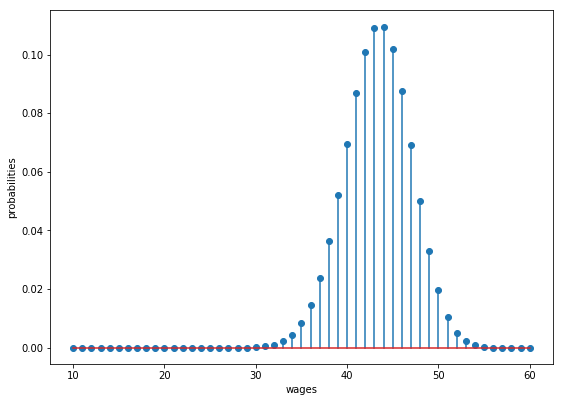

[10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27.
 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60.]


In [65]:
# Define the distribution of wage offers by Beta-Binomial distribution
n, a, b = 50, 200, 100                             # Parameters in the beta binomial distribution function
w_min, w_max = 10, 60                              # min and max of wage offers
w_vals = np.linspace(w_min, w_max, n+1)            # creates new sequences, wages, of evenly spaced numbers, w_min, w_max
dist = BetaBinomial(n, a, b)                       # create 'dist' as BetaBinomial distribution with parameters (n, a, b)
phi_vals = dist.pdf()                              # create 'phi_vals' as probility density function of BB distribution

fig, ax = plt.subplots(figsize=(9, 6.5))           # set figure's axis size
ax.stem(w_vals, phi_vals, label='$\phi (w\')$')    # stem plots vertical lines from a baseline to the y-coordinate and places a marker at the top.
ax.set_xlabel('wages')                             # label x-axis as wage
ax.set_ylabel('probabilities')                     # label y-axis as probabilities

plt.show()

print(w_vals)

Firstly, let's have a look at the sequence of approximate value functions that the algorithm above generates.

Default parameter values are embedded in the function

Our initial guess $v$ is the value of accepting at every given wage.


In [66]:
def plot_value_function_seq(ax,                    # c, b, w_vals are parameters to calculate v; why 'ax'?
                           c=25,
                           b=0.99,
                           w_vals=w_vals,
                           phi_vals=phi_vals,      # phi_vals: pdf of the distribution
                            num_plots=6):          # set the number of plots
    v = w_vals / (1 - b)                           # calculate initial v we guess
    v_next = np.empty_like(v)                      # return a new array with the same shape and type as our initial v
    for i in range(num_plots):                     # range() return a sequence of number, from 0 to num_plot, increments by 1
        ax.plot(w_vals, v, label=f"iterate {i}")   # plot into multiple axes in one figure
        for j, w in enumerate(w_vals):             # enumerate() returns loop over 'w_val' and have an automatic counter
            stop_val = w / (1-b)                   # compute two values and set the larger one to v_next[j]
            cont_val = c + b * np.sum(v * phi_vals)
            v_next[j] = max(stop_val, cont_val)
        v[:] = v_next                              # assign v_next over top of whatever was in v  
    ax.legend(loc='lower right')                   # ax.legend


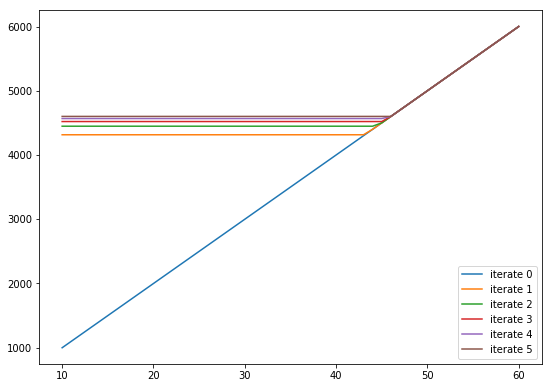

In [67]:
fig, ax = plt.subplots(figsize=(9, 6.5))          
plot_value_function_seq(ax)                        # use the function to show
plt.show()

Here's more serious iteration effort, that continous until measured deviation between successive iterates is below tol.

We will use JIT compilation (Just-in-time) via Numba to turbo charge our loops.

Use this decorator, we can mark a function for optimization by Numba's JIT (just-in-time) compiler.

Numba has two compilation modes: nopython mode and object mode. The former produces much faster code, but has limitations that can force Numba to fall back to the latter. To prevent Numba from falling back, and instead raise an error, pass nopython=True

In [68]:
@jit(nopython=True)                                    # let Numba decide when and how to optimize
def compute_reservation_wage(c=25,                     
                            b=0.99,
                            w_vals=w_vals,
                            phi_vals=phi_vals,
                            max_iter=500,              # set max_iter and tol
                            tol=1e-6):
    v = w_vals / ( 1 - b )                             
    v_next = np.empty_like(v)                          
    i = 0
    error = tol + 1
    while i < max_iter and error > tol:                # difference between while and for
        for j, w in enumerate(w_vals):                  
            stop_val = w / (1-b)                       
            cont_val = c + b * np.sum(v * phi_vals)    # Sum of array elements over a given axis.
            v_next[j] = max(stop_val, cont_val)        
        error = np.max(np.abs(v_next - v))             # np.abs(): calculate the absolute value; np.max(): return the maximum of elements
        i += 1
        v[:] = v_next                                  # assign v_next over top of whatever was in v 
    return (1 - b) * (c + b * np.sum(v * phi_vals))    # this returns w-bar

In [69]:
compute_reservation_wage()

47.316499710024964

### Comparative statics

Now we know how to compute the reservation wage, let's see how it varies with parameters.

First, we change $\beta$ and $c$.

In [70]:
grid_size = 25                            # return a tuple of the number of column and rows in the grid, here number is 25.
R = np.empty((grid_size, grid_size))      # return a new array of given shape and type, without initializing entries.

c_vals = np.linspace(10.0, 30.0, grid_size)  # creates new sequences, c_vals, of evenly spaced numbers, 10, 30
b_vals = np.linspace(0.9, 0.99, grid_size)   # creates new sequences, b_vals, of evenly spaced numbers, 0.9, 0.99

for i, c in enumerate(c_vals):
    for j, b in enumerate(b_vals):
        R[i,j] = compute_reservation_wage(c=c, b=b) # compute reservation wage by using these parameters

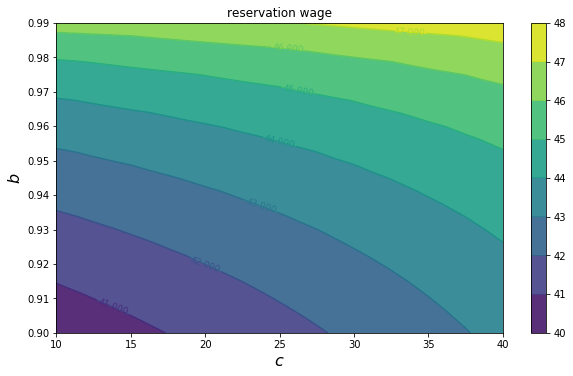

In [84]:
fit, ax = plt.subplots(figsize=(10, 5.7))           # set figure size

csl = ax.contourf(c_vals, b_vals, R.T, alpha=0.9)  # draw filled contours.
ctrl = ax.contour(c_vals, b_vals, R.T)              # draw contour lines (A curve along a function of two variables has a constant value)

plt.clabel(ctrl, inline =1, fontsize=9)    # set label numbers size and place
plt.colorbar(csl, ax=ax)                   # set color bar

ax.set_title("reservation wage")           # set title, sizes of xlabel and ylabel
ax.set_xlabel("$c$", fontsize=16)
ax.set_ylabel("$b$", fontsize=16)

ax.ticklabel_format(useOffset=False)    # Change the scalarformatter used by default for linear axes; use
                                        # useOffset: if True, the offset will be calculated as needed; if False, no offset will be used.
plt.show()                              # draw the graph

The reservation wage increases both with patience and with unemployment compensation.

## 2.4 Computing the optimal policy: take 2

Let $h$ denote the value of not accepting a job in this period but then behaving optimally in all subsequent periods.
$$
h = c + \beta \sum_{w'} v^*(w') \phi(w')
$$
By the Bellman equation, we then have
$$
v^*(w')= \max{\{ \frac{w'}{1-\beta},h \}}
$$
Substituting this last equation into (14), we have
$$
h = c + \beta \sum_{w'} \max{\{ \frac{w'}{1-\beta},h \}}\phi(w')
$$
which is a nonlinear equation that we can solve for $h$.

The natural solution method for this kind of nonlinear equation is iterative:

#### Step 1

Pick an initial guess $h$.

#### Step 2

Compute the update $h'$ via
$$
h' = c + \beta \sum_{w'} \max{\{ \frac{w'}{1-\beta},h \}}\phi(w')
$$

#### Step 3

Calculate the deviation $|h-h'|$.

#### Step 4

If the deviation is larger than some fixed tolerance, set $h=h'$ and do Step 2 again.

Else continue to Step 5.

#### Step 5

Return $h$.

Once again, one can use the Banach contraction mapping theorem to show that this process always converges.

The big difference here is that we are iterating on a single number, rather than an $n$-vector.

In [72]:
@jit(nopython=True)
def compute_reservation_wage_two(c=25,
                                b=0.99,
                                w_vals=w_vals,
                                phi_vals=phi_vals,
                                max_iter=500,
                                tol=1e-5):
    # compute phi
    h = np.sum(w_vals * phi_vals) / (1 - b)    # pick an initial guess h
    i = 0                                      # set counting number i
    error = tol + 1                            # set error level we bear
    while i < max_iter and error > tol:        # two conditions for the loop
        s = np.maximum(w_vals / ( 1 - b), h)   # compute v*
        h_next = c + b * np.sum(s * phi_vals)  # compute h'
        error = np.abs(h_next - h)             # compute deviation |h - h'|
        i += 1                                 # 
        h = h_next                             # set h = h'
        
    # compute the researvation wage
    return (1 - b) * h                         

## Exercises

In [73]:
cdf = np.cumsum(phi_vals)          # return the cumulative sum of the elements along a given axis

# Calculate time to accept the offer (unemployment time)

@jit(nopython=True)
def compute_stopping_time(w_bar, seed = 1234): 
    np.random.seed(seed)           # return the same result if you call the numpy's other random function every time.
    t = 1
    while True:
        w = w_vals[qe.random.draw(cdf)] # random draw numbers from the distribution with cdf
        if w >= w_bar:
            stopping_time = t
            break
        else:
            t += 1
    return stopping_time


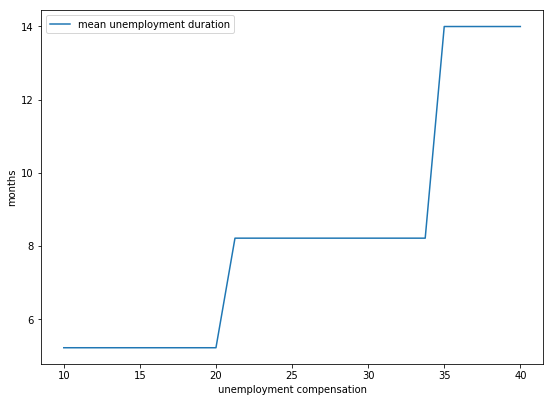

In [76]:
# compute the mean of unemployment time

@jit(nopython=True)
def compute_mean_stopping_time(w_bar, num_reps=100000):
    obs = np.empty(num_reps)                    # return a new array of given shape and type, without initializing entries
    for i in range(num_reps):
        obs[i] = compute_stopping_time(w_bar, seed = i)
    return obs.mean()                           # compute the mean of obs

# Plug values into our functions defined

c_vals = np.linspace(10, 40, 25)       
stop_times = np.empty_like(c_vals)              # return a new array with the same shape and type as a given array (c_vals)
for i, c in enumerate(c_vals):
    w_bar = compute_reservation_wage_two(c=c)
    stop_times[i] = compute_mean_stopping_time(w_bar)
    
fig, ax = plt.subplots(figsize = (9, 6.5))      # set figure size

ax.plot(c_vals, stop_times, label="mean unemployment duration")    # set figure parameters, and title 
ax.set(xlabel="unemployment compensation", ylabel="months")        # set xlabel and ylabel
ax.legend()                                                        # ?

plt.show()
